In [1]:
!pip show tensorflow
!pip install np_utils
# Upgrade TensorFlow to the latest version
!pip install --upgrade tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\Owner\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [2]:
# Pandas and Numpy for data structures and util fucntions
import scipy as sp
import numpy as np
import pandas as pd
from numpy.random import rand
pd.options.display.max_colwidth = 600

# Scikit Imports
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

import cnn_utils as utils
from model_evaluation_utils import get_metrics

# Matplot Imports
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

# pandas display data frames as tables
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [5]:
#import tensorflow.keras as keras
#from tensorflow.keras.layers import Layer
#from tensorflow.keras.models import Model
import tensorflow.keras as keras

In [7]:
pip install --upgrade keras


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [12]:
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.datasets import cifar10
from keras.models import Model
from keras.applications import vgg16 as vgg
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from PIL import Image

# Load and Prepare DataSet

In [13]:
BATCH_SIZE = 32
EPOCHS = 40
NUM_CLASSES = 10
LEARNING_RATE = 1e-4
MOMENTUM = 0.9

In [14]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [15]:

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.15, 
                                                  stratify=np.array(y_train), 
                                                  random_state=42)

In [16]:
Y_train = to_categorical(y_train, NUM_CLASSES)
Y_val = to_categorical(y_val, NUM_CLASSES)
Y_test = to_categorical(y_test, NUM_CLASSES)

# Preprocessing

In [17]:
new_size = (48, 48)

def resize_array(arr):
    return np.array([np.array(Image.fromarray(x).resize(new_size)) for x in arr])

X_train = resize_array(X_train)
X_val = resize_array(X_val)
X_test = resize_array(X_test)


# Prepare the Model

In [18]:
base_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(48, 48, 3))

In [19]:
# Extract the last layer from third block of vgg16 model
last = base_model.get_layer('block3_pool').output

In [20]:
# Add classification layers on top of it
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x)
pred = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(base_model.input, pred)

In [21]:
for layer in base_model.layers:
     layer.trainable = False

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,870,666 (7.14 MB)

 Trainable params: 134,666 (526.04 KB)

 Non-trainable params: 1,736,000 (6.62 MB)

# Data Augmentation

In [25]:
# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    horizontal_flip=False)

In [26]:
train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train,
                                     Y_train, 
                                     batch_size=BATCH_SIZE)

In [29]:
val_datagen = ImageDataGenerator(rescale=1. / 255,
    horizontal_flip=False)

val_datagen.fit(X_val)
val_generator = val_datagen.flow(X_val,
                                 Y_val,
                                 batch_size=BATCH_SIZE)

# Train the Model

In [33]:
train_steps_per_epoch = X_train.shape[0] // BATCH_SIZE
val_steps_per_epoch = X_val.shape[0] // BATCH_SIZE


history = model.fit(train_generator,
                    steps_per_epoch=train_steps_per_epoch,
                    validation_data=val_generator,
                    validation_steps=val_steps_per_epoch,
                    epochs=EPOCHS,
                    verbose=1)


Epoch 1/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 235s 177ms/step - accuracy: 0.4633 - loss: 0.2455 - val_accuracy: 0.6218 - val_loss: 0.1814
Epoch 2/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - accuracy: 0.6250 - loss: 0.1905 - val_accuracy: 0.5833 - val_loss: 0.1944
Epoch 3/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 287s 216ms/step - accuracy: 0.5702 - loss: 0.2048 - val_accuracy: 0.6643 - val_loss: 0.1630
Epoch 4/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 0s 119us/step - accuracy: 0.5625 - loss: 0.1955 - val_accuracy: 0.6667 - val_loss: 0.1229
Epoch 5/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 303s 228ms/step - accuracy: 0.6229 - loss: 0.1821 - val_accuracy: 0.6852 - val_loss: 0.1523
Epoch 6/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 0s 122us/step - accuracy: 0.6875 - loss: 0.1759 - val_accuracy: 0.7500 - val_loss: 0.1521
Epoch 7/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 350s 264ms/step - accuracy: 0.6503 - loss: 0.1697 - val_accuracy: 0.6982 - val_loss: 0.1450
Epoch 8/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 0s 135us/step - accuracy: 

# Analyze Model Performance

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


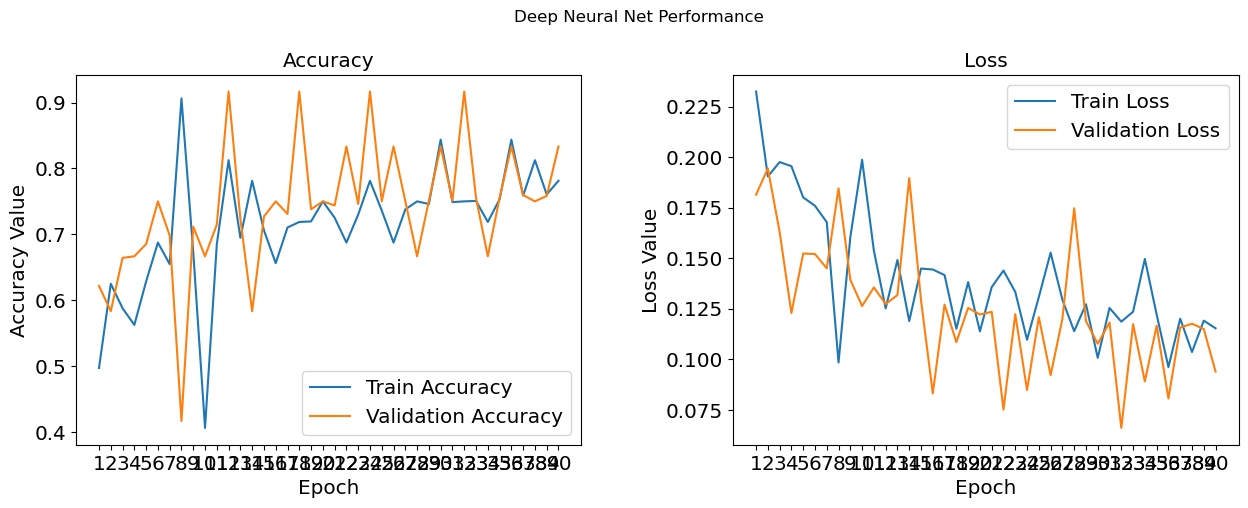

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = list(range(1,EPOCHS+1))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [40]:
predictions = model.predict(X_test/255.)

313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 237ms/step


In [41]:
test_labels = list(y_test.squeeze())
predictions = list(predictions.argmax(axis=1))

In [42]:
get_metrics(true_labels=y_test, 
                predicted_labels=predictions)

Accuracy: 0.7598
Precision: 0.7577
Recall: 0.7598
F1 Score: 0.758


# Visualize Predictions

In [43]:
label_dict = {0:'airplane',
             1:'automobile',
             2:'bird',
             3:'cat',
             4:'deer',
             5:'dog',
             6:'frog',
             7:'horse',
             8:'ship',
             9:'truck'}

In [44]:
utils.plot_predictions(model=model,dataset=X_test/255.,
                       dataset_labels=Y_test,
                       label_dict=label_dict,
                       batch_size=16,
                       grid_height=4,
                       grid_width=4)

AttributeError: module 'cnn_utils' has no attribute 'plot_predictions'

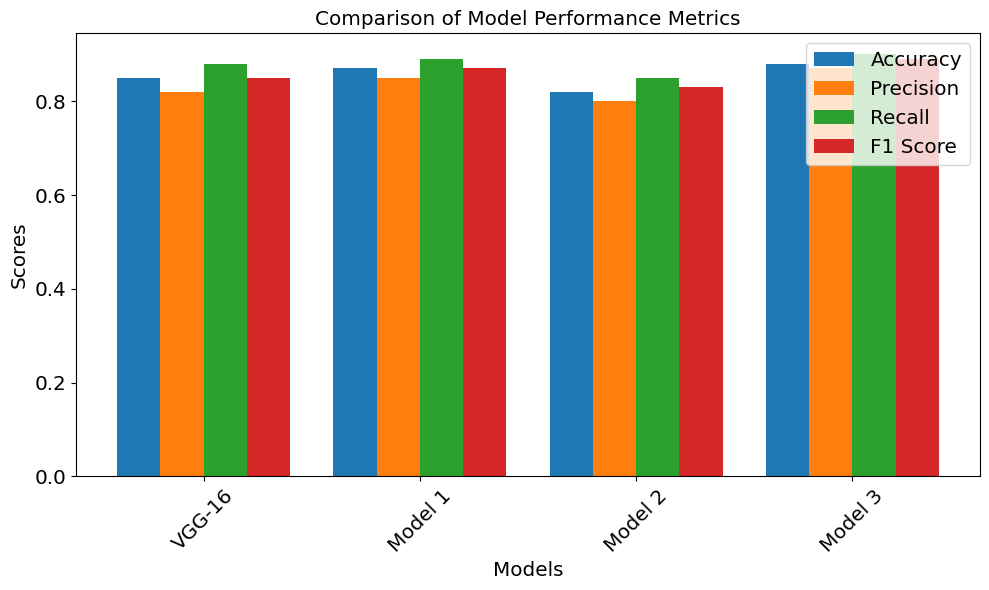

In [46]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
models = ['VGG-16', 'Model 1', 'Model 2', 'Model 3']
accuracy = [0.85, 0.87, 0.82, 0.88]
precision = [0.82, 0.85, 0.80, 0.87]
recall = [0.88, 0.89, 0.85, 0.90]
f1_score = [0.85, 0.87, 0.83, 0.89]

# Plotting the bar plot
x = range(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x, accuracy, width, label='Accuracy')
bar2 = ax.bar([i + width for i in x], precision, width, label='Precision')
bar3 = ax.bar([i + width*2 for i in x], recall, width, label='Recall')
bar4 = ax.bar([i + width*3 for i in x], f1_score, width, label='F1 Score')

# Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks([i + 1.5 * width for i in x])
ax.set_xticklabels(models)
ax.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
